# Solution {-}

Analyst A computes the variance as 2-state model.

In [1]:
from numpy import array, eye, arange
from numpy.linalg import inv
import matplotlib.pyplot as plt

phi = array([[1, 0],
             [0, 1]])

Q = array([[0, 0],
           [0, 1]])

H = array([[1, 1]])

R = array([[4]])

# Initial covariance
P = array([[100, 0],
           [0, 0]])

# Plot vector
varA = []

for k in range(0, 50):
    
    # Project ahead
    P = phi@P@phi.T + Q
    
    # Kalman gain
    K = P@H.T@inv(H@P@H.T + R)
    
    # Update
    P = (eye(2) - K@H)@P
    varA.append(P[0, 0] + 2*P[0, 1] + P[1, 1])

Analyst B computes the variance as 1-state model.

In [2]:
phi = 1
Q = 1
H = 1
R = 4

# Initial covariance
P = 100

# Plot vector
varB = []

for i in range(0, 50):
    
    # Project ahead
    P = phi*P*phi + Q
    
    # Kalman gain
    K = P*H/(H*P*H + R)
    
    # Update
    P = (1 - K*H)*P
    varB.append(P)

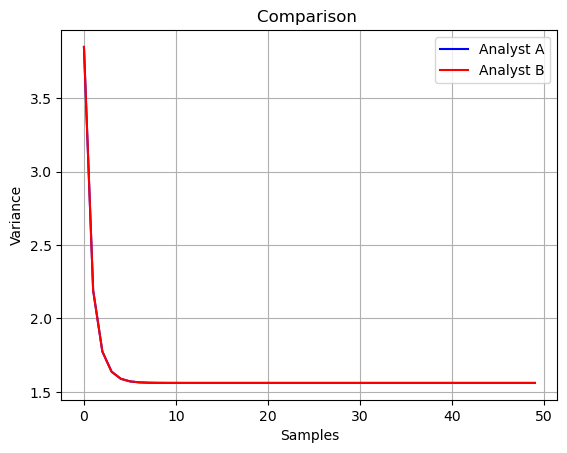

In [3]:
# Plot results
s = arange(0, 50)
plt.figure(1)
plt.plot(s, varA, 'b', label='Analyst A')
plt.plot(s, varB, 'r', label='Analyst B')
plt.title('Comparison ')
plt.xlabel('Samples')
plt.ylabel('Variance')
plt.legend(loc='upper right')
plt.grid(True, which='both')
plt.show()